In [3]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r"C:\Users\yigit\Downloads\archive(23)\dataset.csv"  
data = pd.read_csv(file_path)

In [5]:
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Information:")
print(data.info())

First 5 rows of the dataset:
   Unnamed: 0            timestamp  value
0           0  2014-07-01 00:00:00  10844
1           1  2014-07-01 00:30:00   8127
2           2  2014-07-01 01:00:00   6210
3           3  2014-07-01 01:30:00   4656
4           4  2014-07-01 02:00:00   3820

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10320 non-null  int64 
 1   timestamp   10320 non-null  object
 2   value       10320 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 242.0+ KB
None


In [7]:
data['timestamp'] = pd.to_datetime(data['timestamp'])


print("\nTimestamp Conversion Success:")
print(data['timestamp'].head())
print("\nMissing values per column:")
print(data.isnull().sum())



Timestamp Conversion Success:
0   2014-07-01 00:00:00
1   2014-07-01 00:30:00
2   2014-07-01 01:00:00
3   2014-07-01 01:30:00
4   2014-07-01 02:00:00
Name: timestamp, dtype: datetime64[ns]

Missing values per column:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


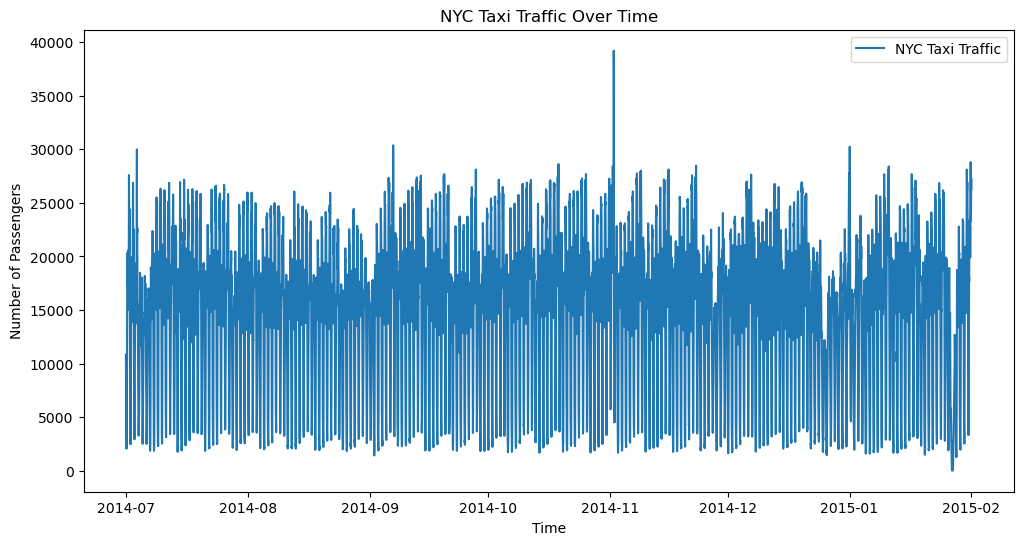

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['value'], label='NYC Taxi Traffic')
plt.title('NYC Taxi Traffic Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

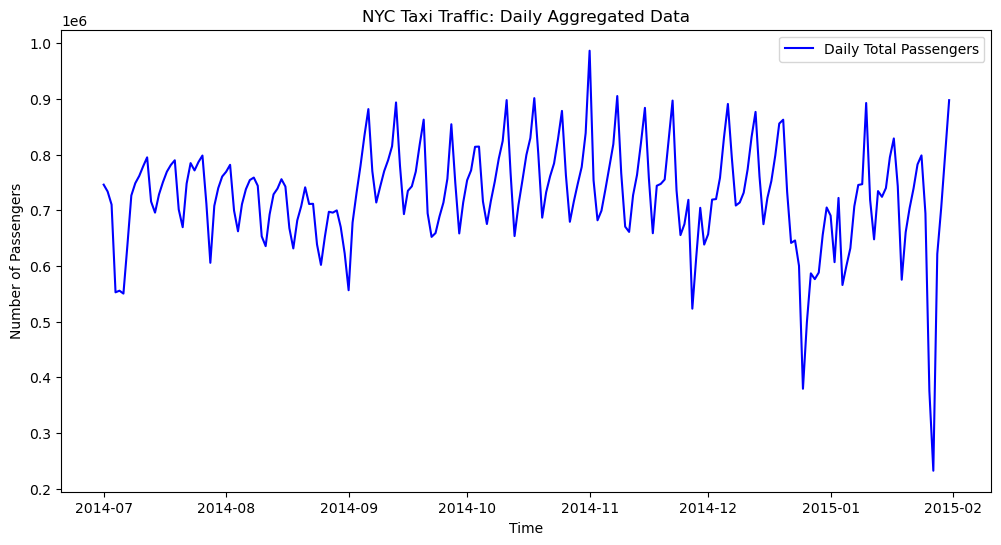

First 5 rows of resampled data:
   timestamp  Unnamed: 0   value
0 2014-07-01        1128  745967
1 2014-07-02        3432  733640
2 2014-07-03        5736  710142
3 2014-07-04        8040  552565
4 2014-07-05       10344  555470


In [11]:

daily_data = data.resample('D', on='timestamp').sum()


daily_data.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(daily_data['timestamp'], daily_data['value'], label='Daily Total Passengers', color='blue')
plt.title('NYC Taxi Traffic: Daily Aggregated Data')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


print("First 5 rows of resampled data:")
print(daily_data.head())


First 5 rows of normalized data:
   timestamp   value  normalized_value
0 2014-07-01  745967          0.681116
1 2014-07-02  733640          0.664778
2 2014-07-03  710142          0.633635
3 2014-07-04  552565          0.424788
4 2014-07-05  555470          0.428638


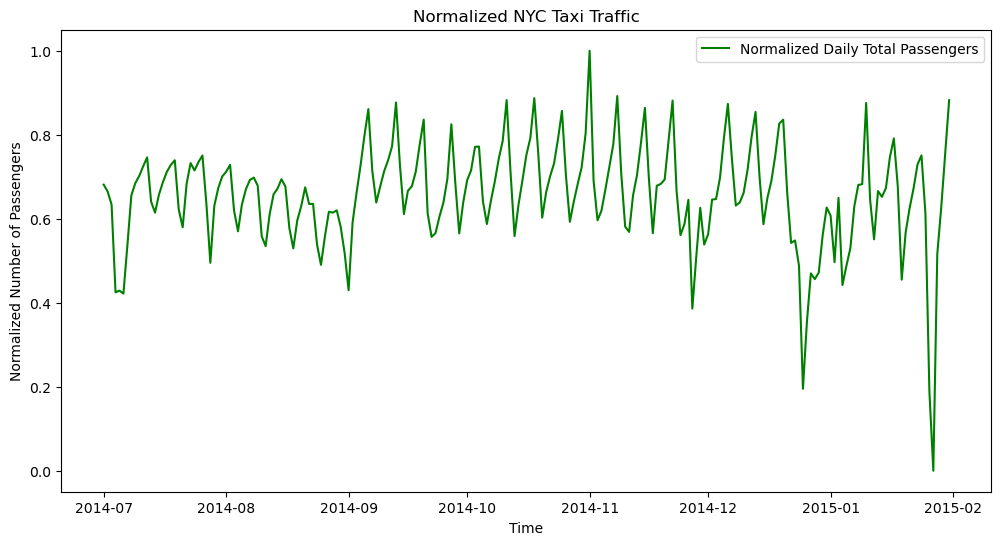

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

daily_data['normalized_value'] = scaler.fit_transform(daily_data[['value']])

print("First 5 rows of normalized data:")
print(daily_data[['timestamp', 'value', 'normalized_value']].head())


plt.figure(figsize=(12, 6))
plt.plot(daily_data['timestamp'], daily_data['normalized_value'], label='Normalized Daily Total Passengers', color='green')
plt.title('Normalized NYC Taxi Traffic')
plt.xlabel('Time')
plt.ylabel('Normalized Number of Passengers')
plt.legend()
plt.show()


In [15]:
import numpy as np

SEQUENCE_LENGTH = 30  

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i + sequence_length]  
        sequences.append(sequence)
    return np.array(sequences)
data_sequences = create_sequences(daily_data['normalized_value'].values, SEQUENCE_LENGTH)

print(f"Shape of Data Sequences: {data_sequences.shape}")
print(f"First Sequence:\n{data_sequences[0]}")


Shape of Data Sequences: (185, 30)
First Sequence:
[0.68111622 0.66477847 0.63363507 0.42478827 0.42863845 0.42176644
 0.53612543 0.65536176 0.68456217 0.70183033 0.72492346 0.74612
 0.6409365  0.61453261 0.65774211 0.68709759 0.71204358 0.727993
 0.73917244 0.6218738  0.57984255 0.68372321 0.73241044 0.71502565
 0.7350837  0.75044996 0.6355648  0.49502724 0.63053372 0.67288969]


In [17]:

TRAIN_RATIO = 0.8

split_index = int(len(data_sequences) * TRAIN_RATIO)

X_train = data_sequences[:split_index]
X_test = data_sequences[split_index:]

print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Training Set Shape: (148, 30)
Testing Set Shape: (37, 30)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed


model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=False),
    RepeatVector(X_train.shape[1]),  
    LSTM(64, activation='relu', return_sequences=True),  
    TimeDistributed(Dense(1))  
])


model.compile(optimizer='adam', loss='mse')


model.summary()


C:\Users\yigit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 30, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:

history = model.fit(
    X_train.reshape(X_train.shape[0], X_train.shape[1], 1),  
    X_train.reshape(X_train.shape[0], X_train.shape[1], 1), 
    epochs=30,  
    batch_size=32,  
    validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), 
                     X_test.reshape(X_test.shape[0], X_test.shape[1], 1)),  
    shuffle=True 
)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 466ms/step - loss: 0.4389 - val_loss: 0.2724
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2828 - val_loss: 0.1417
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1166 - val_loss: 0.0697
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0771 - val_loss: 0.0522
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0413 - val_loss: 0.0583
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0509 - val_loss: 0.0534
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0417 - val_loss: 0.0460
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0352 - val_loss: 0.0484
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0355 - val_loss: 0.0436
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0304 - val_loss: 0.0425
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0306 - val_loss: 0.0410
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0294 - val_loss: 0.0404

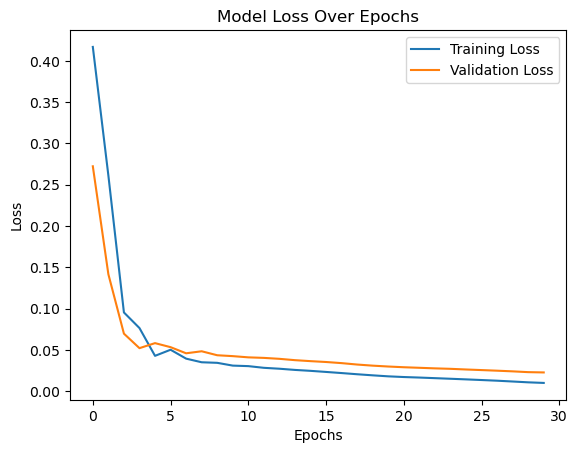

In [23]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 919ms/step
Reconstruction Errors: [0.02366238 0.02409926 0.02422419 0.02590672 0.0255134  0.02491201
 0.02471152 0.02406523 0.02516889 0.02666218 0.02836595 0.02527095
 0.02307184 0.02249508 0.02246989 0.02317489 0.02626929 0.02557326
 0.02096222 0.01852055 0.01840955 0.01857681 0.020065   0.02234034
 0.02207271 0.02004172 0.01972342 0.02052613 0.01976023 0.01652562
 0.01288413 0.01136411 0.01629858 0.02804908 0.02916998 0.03043143
 0.0313936 ]


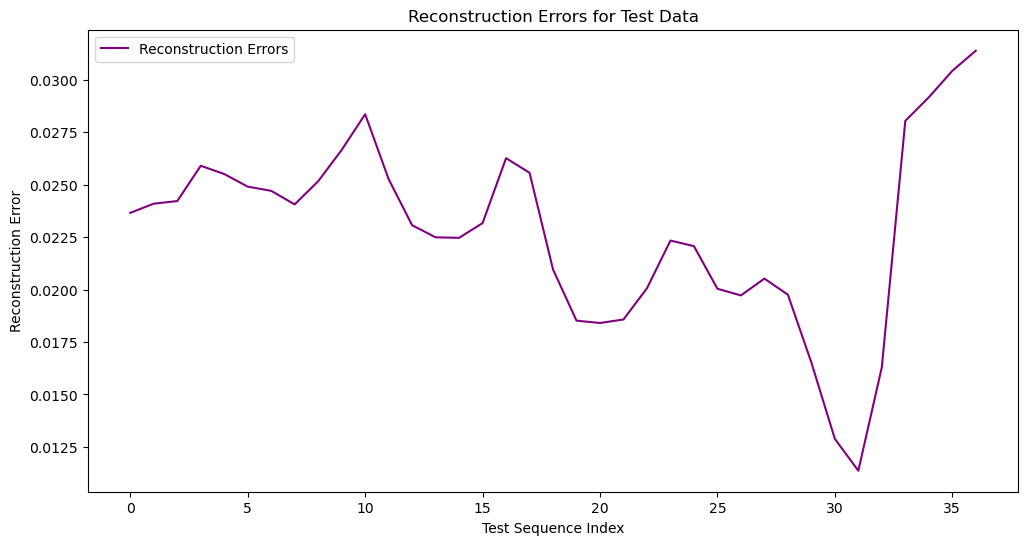

In [25]:

X_test_reconstructed = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

reconstruction_errors = np.mean(np.square(X_test.reshape(X_test.shape[0], X_test.shape[1]) - X_test_reconstructed.reshape(X_test_reconstructed.shape[0], X_test_reconstructed.shape[1])), axis=1)

print(f"Reconstruction Errors: {reconstruction_errors}")

plt.figure(figsize=(12, 6))
plt.plot(reconstruction_errors, label='Reconstruction Errors', color='purple')
plt.title('Reconstruction Errors for Test Data')
plt.xlabel('Test Sequence Index')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()


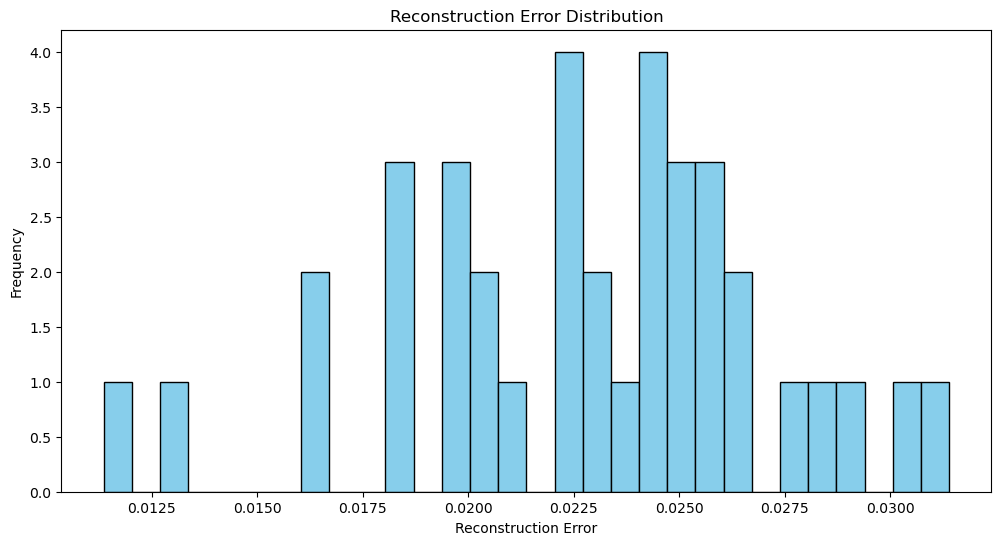

Threshold for anomalies (95th Percentile): 0.029422268496606792
Number of anomalies detected: 2
Indices of anomalies: [35 36]


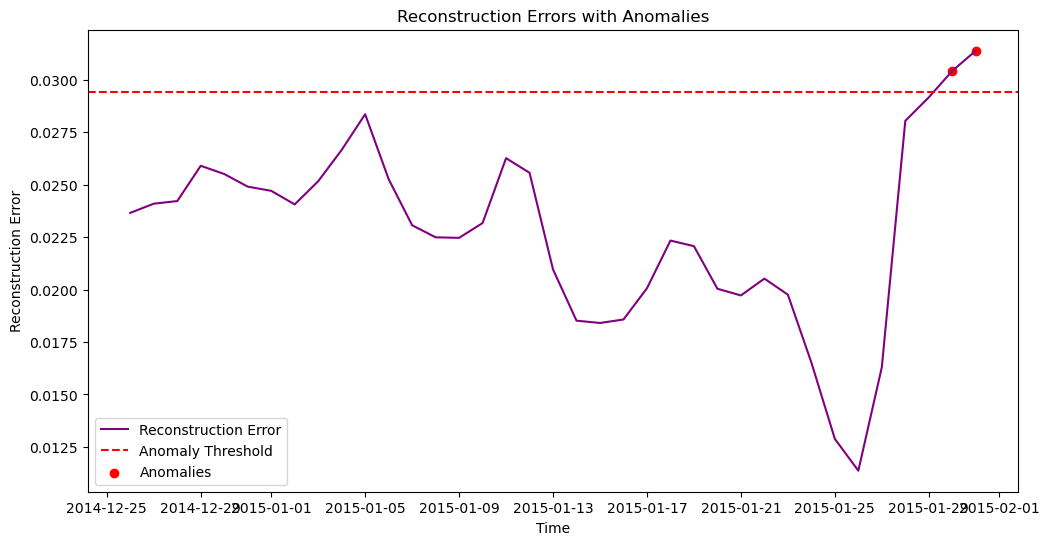

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Visualize Reconstruction Error Distribution
plt.figure(figsize=(12, 6))
plt.hist(reconstruction_errors, bins=30, color='skyblue', edgecolor='black')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.show()

# Step 2: Define Threshold for Anomalies
threshold = np.percentile(reconstruction_errors, 95)  # Using 95th percentile
print(f"Threshold for anomalies (95th Percentile): {threshold}")

# Step 3: Flag Anomalies
anomalies = reconstruction_errors > threshold
anomaly_indices = np.where(anomalies)[0]
print(f"Number of anomalies detected: {len(anomaly_indices)}")
print(f"Indices of anomalies: {anomaly_indices}")

# Step 4: Visualize Anomalies on Original Data
plt.figure(figsize=(12, 6))
plt.plot(daily_data['timestamp'][-len(reconstruction_errors):], reconstruction_errors, label="Reconstruction Error", color='purple')
plt.axhline(y=threshold, color='red', linestyle='--', label="Anomaly Threshold")
plt.scatter(
    daily_data['timestamp'][-len(reconstruction_errors):].iloc[anomaly_indices],
    reconstruction_errors[anomaly_indices],
    color='red',
    label="Anomalies"
)
plt.title("Reconstruction Errors with Anomalies")
plt.xlabel("Time")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.show()
